In [1]:
from IPython.display import Image

# 오차 수정하기 : 경사 하강법
기울기 a를 너무 크게 잡으면 오차가 커짐.  
기울기 a를 너무 자겍 잡아도 오차가 커짐.  "
**->기울기 a와 오차사이에는 상관관계가 있음.**

$\begin{align} \text{if } \lim_{a\to \infty} y=ax+b \Rightarrow error \uparrow \end{align}$<br>
$\begin{align} \text{if } \lim_{a\to -\infty} y=ax+b \Rightarrow error \uparrow \end{align}$

> 기울기 a와 오차와의 관계에대한 이자 함수 그래프

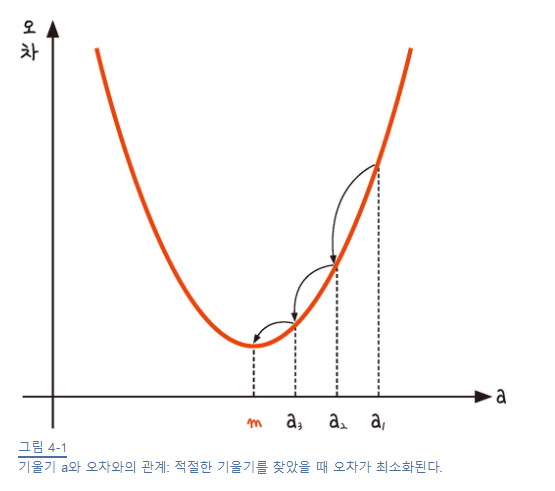

In [2]:
Image("D:/jupyter/deep_learning_for_everyone/04/4-1.png", width=300)

오차가 가장 적은곳->기울기가 0인곳  
임의의 위치에서 가장 적은곳으로 가는법.  
기울기가 보다 0에 가까운 쪽으로 이동.  
**-> 경사하강법(gradient descent)**

# 경사 하강법의 개요
임의의 순간 a1, a2에대하여 미분을하면

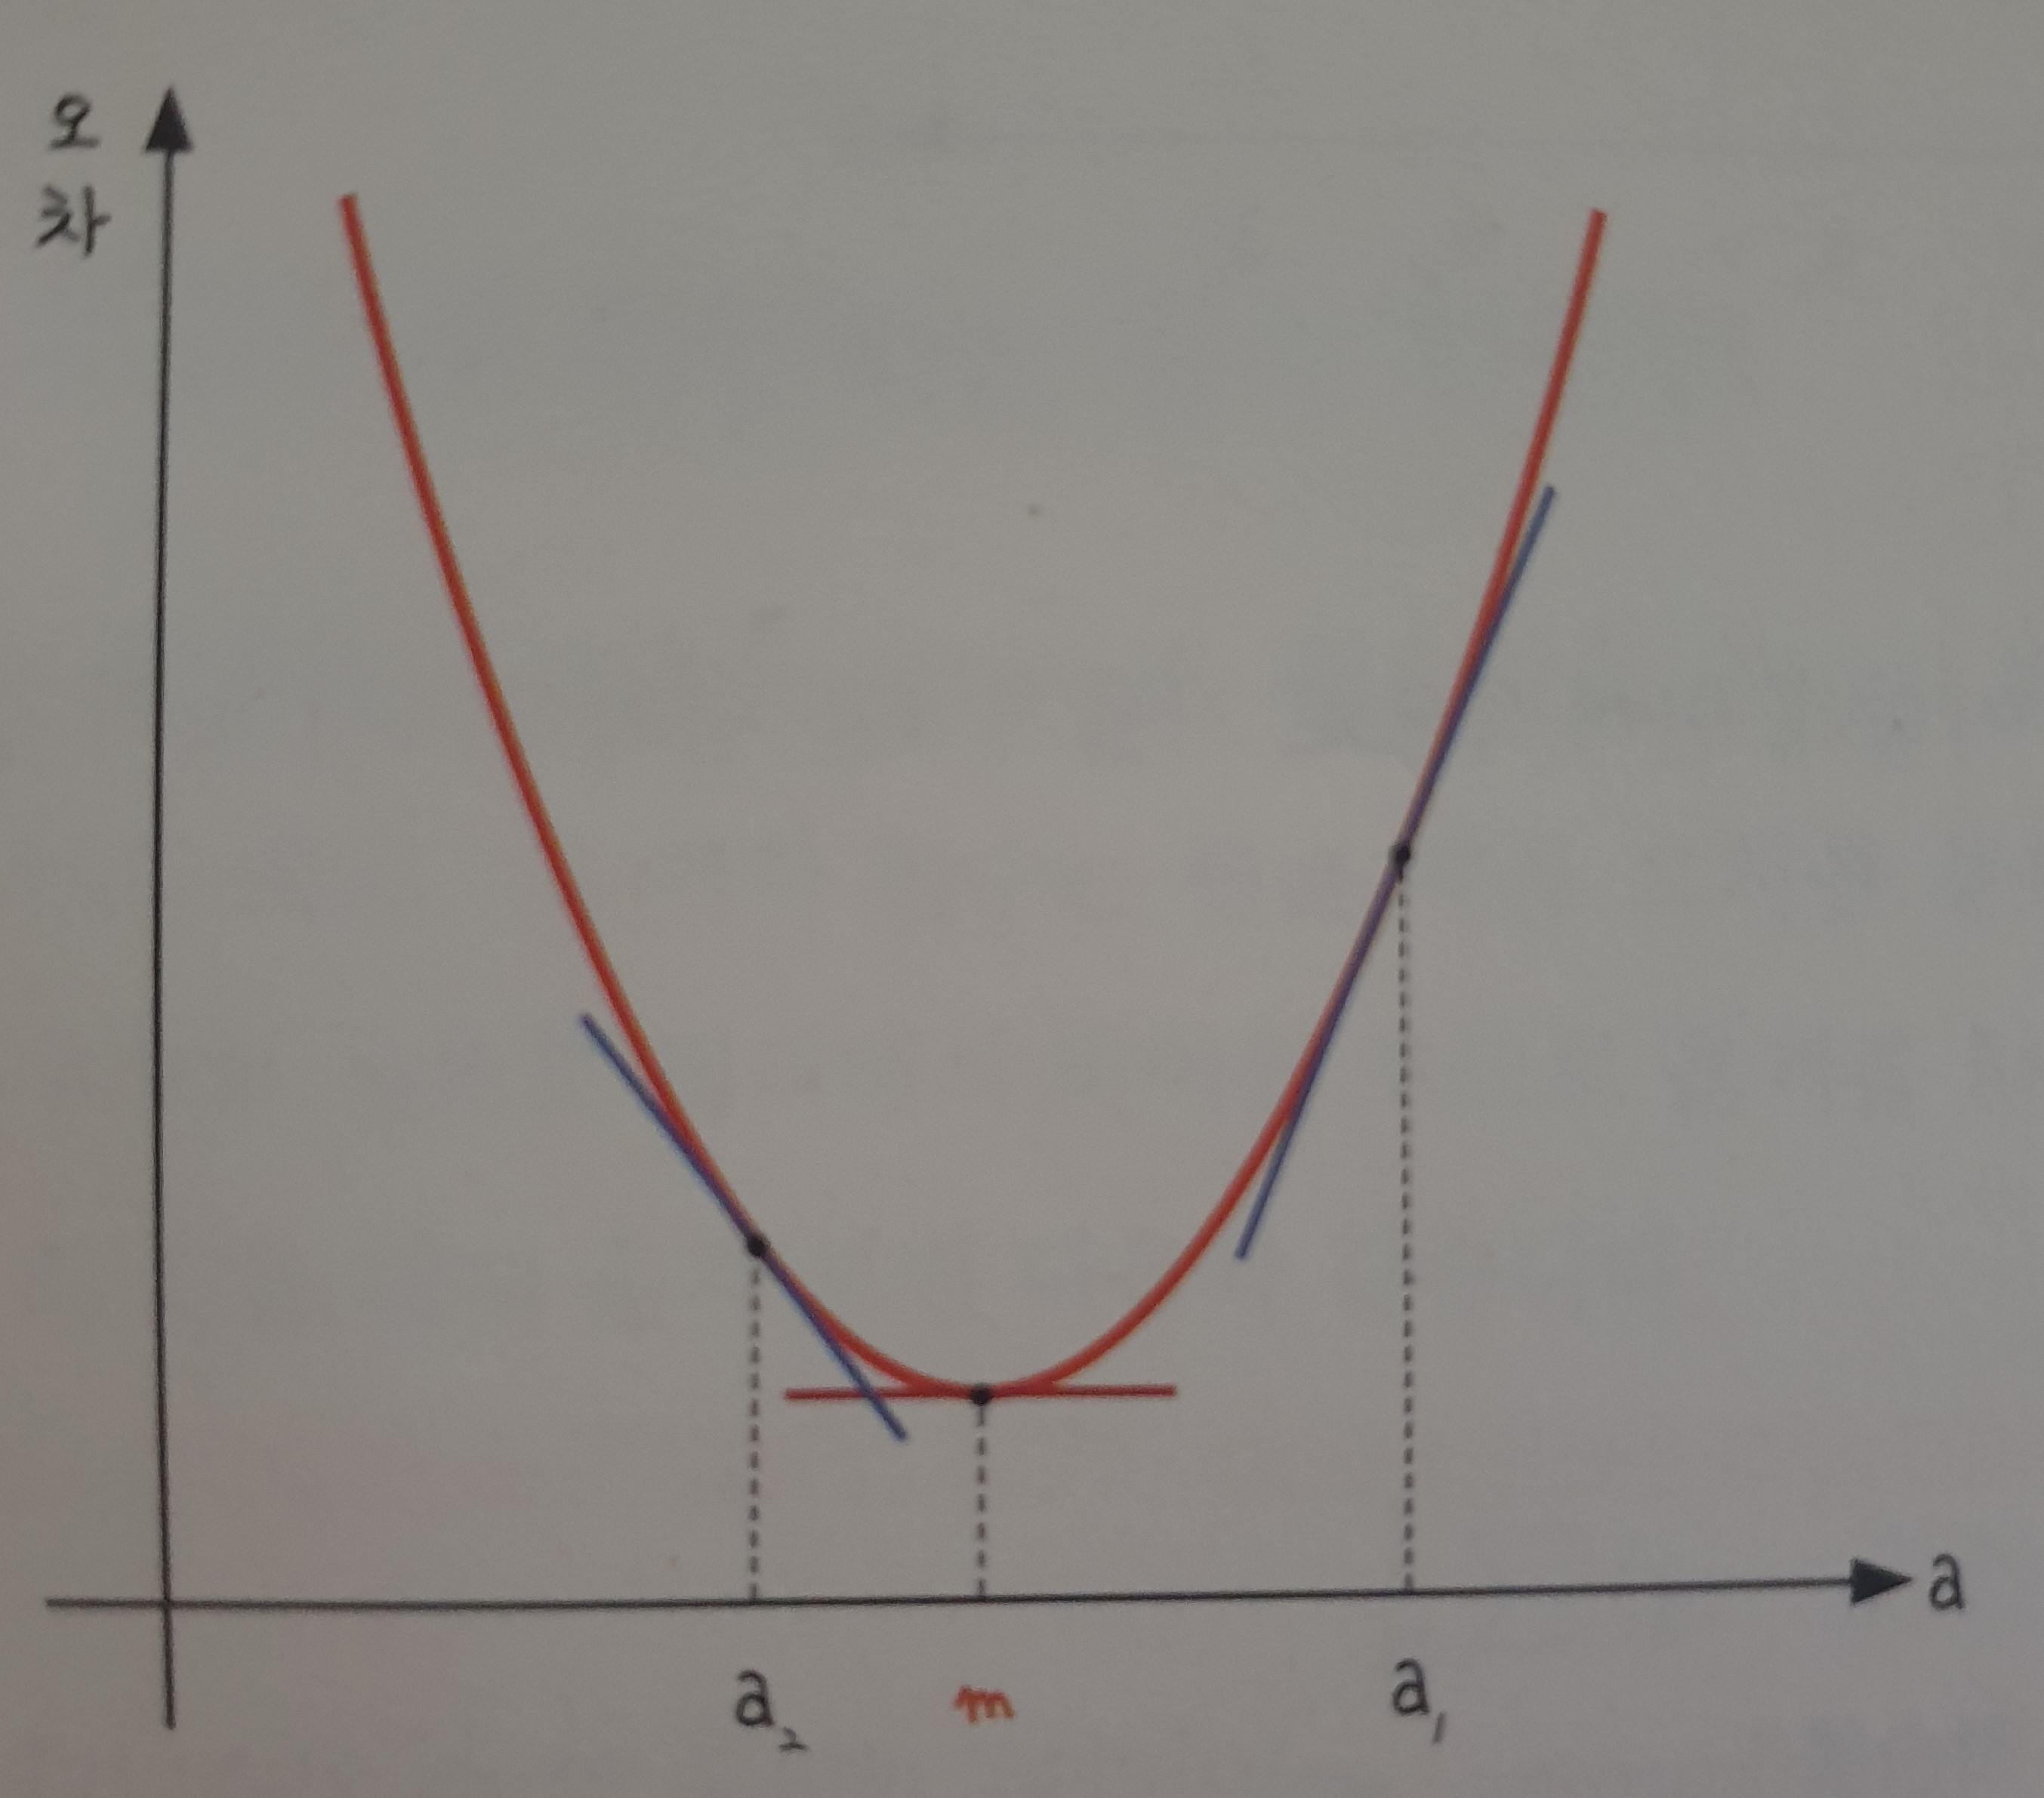

In [3]:
Image("D:/jupyter/deep_learning_for_everyone/04/4-2.jpg",width=300)

최소값 m에서의 기울기 = 0  
따라서, 우리이 목표는 기울기가 0인 지점을 찾아가는것.

1. a1에서 미분을 구한다.
2. 구해진 기울기의 반대방향으로 이동시킨 a2에서 미분을 구한다.
3. 위에서 구한 미분값이 0이 아니면 위 과정을 반복한다.

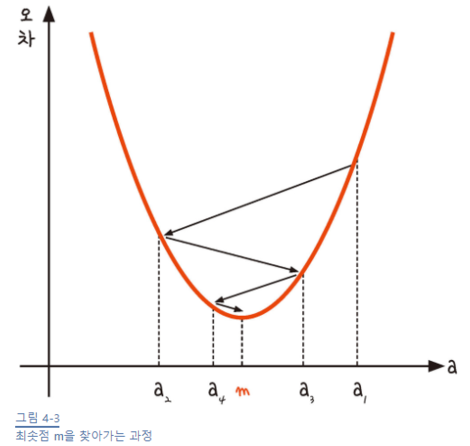

In [4]:
Image("D:/jupyter/deep_learning_for_everyone/04/4-3.png",width=300)

이것이 바로, '경사 하강법'이다.

# 학습률(learning rate)
학습률이란? 기울기의 부호를 바꿔 이동시킬 때, 적절한 거리를 찾지 못한다면,  
a값이 한점으로 모이지못함.

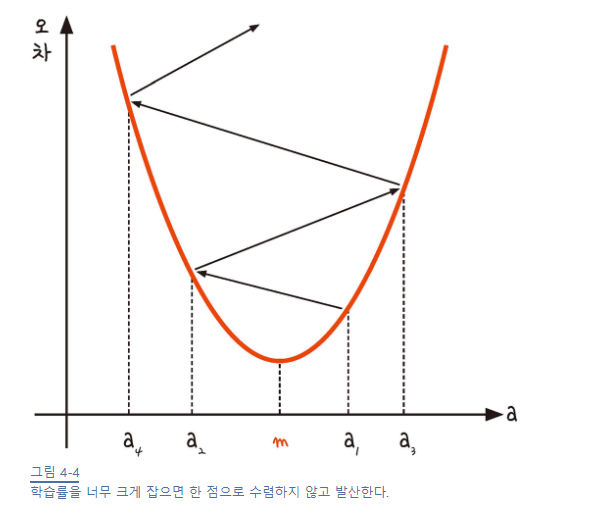

In [5]:
Image("D:/jupyter/deep_learning_for_everyone/04/4-4.png",width=300)

> 따라서, 이 적절한 거리를 잘 정해주어야하는데, 이때 이동 거리를 정해주는 것이 바로 **학습률.**

딥러닝에서 최적의 학습률을 찾는것은 중요한 최적화 과정!

y의절편인 (y=ax+b) b의 값도 이와 같은 성질을 가지고 있습니다. b값이 너무 크거나 작으면 오차가 커지는 것.  
따라서, 최적의 b값을 구할 때도, 경사하강법을 사용

# 코딩으로 확인하는 경사 하강법
- 내용 정리  
    1. 평균 제곱 오차로 이차함수를 만든다.
    2. 1에서의 이차함수를 미분하여 최솟값을 구한다.

$\begin{align} \frac {1}{n} \sum (\hat y_i-y_i)^2 \xrightarrow[대입]{y_i=x_i+b} \frac {1}{n} \sum ((ax_i+b)-y_i)^2 \end{align}$


※우리가 원하는것은 a와 b의 값.
따라서, a와 b에대한 편미분을해야함.

a로편미분한 결과 = $\begin{align} \frac {2}{n} \sum (ax_i+b-y_i)x_i \end{align}$  
b로편미분한 결과 = $\begin{align} \frac {2}{n} \sum (ax_i+b-y_i) \end{align}$

> 이것을 파이선 코드로

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

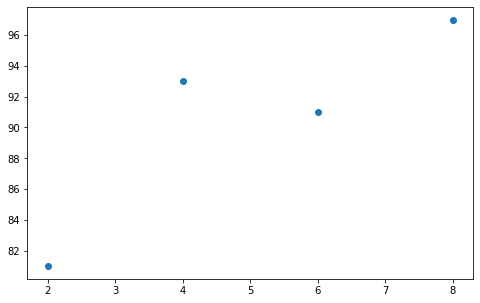

epoch=0, 기울기=23.2000, 절편=4.5250
epoch=100, 기울기=7.9316, 절편=45.3932
epoch=200, 기울기=4.7953, 절편=64.1094
epoch=300, 기울기=3.4056, 절편=72.4022
epoch=400, 기울기=2.7899, 절편=76.0766
epoch=500, 기울기=2.5171, 절편=77.7047
epoch=600, 기울기=2.3962, 절편=78.4261
epoch=700, 기울기=2.3426, 절편=78.7457
epoch=800, 기울기=2.3189, 절편=78.8873
epoch=900, 기울기=2.3084, 절편=78.9501
epoch=1000, 기울기=2.3037, 절편=78.9779
epoch=1100, 기울기=2.3016, 절편=78.9902
epoch=1200, 기울기=2.3007, 절편=78.9957
epoch=1300, 기울기=2.3003, 절편=78.9981
epoch=1400, 기울기=2.3001, 절편=78.9991
epoch=1500, 기울기=2.3001, 절편=78.9996
epoch=1600, 기울기=2.3000, 절편=78.9998
epoch=1700, 기울기=2.3000, 절편=78.9999
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


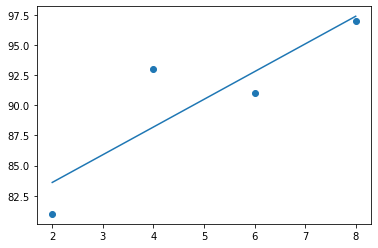

In [7]:
#공부시간 X와 성적 Y의 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 나타내기
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기
#인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함
x_data = np.array(x)
y_data = np.array(y)

#기울기 a와 절편 b의 값 초기화
a = 0
b = 0

#학습률
lr = 0.05

#몇 번 반복될지 설정(0부터 세어지니 원하는 반복값 +1)
epochs = 2001

for i in range(epochs):  #반복 횟수
    y_pred = a * x_data + b  # y를 구하는 식
    error = y_data - y_pred  # 오차를 구하는 식

    #오차 함수를 a로 미분한 값.
    a_diff = -(1 / len(x_data)) * sum(x_data * (error))
    #오차 함수를 b로 미분한 값.
    b_diff = -(1 / len(x_data)) * sum(y_data - y_pred)

    a = a - lr * a_diff  #학습률을 곱하여 기존의 a값을 업데이트
    b = b - lr * b_diff  #학습률을 곱하여 기존의 b값을 업데이트

    if i % 100 == 0:  #100번이 반복될 때마다 현재의 a값, b값 출력
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

기울기 a가 2.3에 수렴.  
절편 b가 79에 수렴.  
-> 최소제곱법을 통해 확인한 값과 같음.  
이렇게 해서 최소 제곱법을 쓰지 않고 평균 제곱 오차와 경사 하강법을 통해 값을 도출.  
이와 같은 방식으로 미지수가 여러개인 다중 선형 회귀에서도 사용

# 다중 선형 회귀란
이전까지 배운것 -> 공부한 시간에 따른 성적  
but 실제 성적 사이에는 오차가 존재.  
4시간공부-> y_hat= 88 but y= 93  
6시간공부-> y_hat= 93 but y= 91  
공부한 시간만으로는 정확한 예측이 불가하다.  
-> 성적에 영향을 주는 다른 요소가 있음.  
보다 정화한 예측 을 위해서는 추가 정보(추가 요소)가 필요하다.  
이렇게 미지수(변수)의 개수가 2개이상인 상황에서의 선형회귀를 **다중 선형 회귀**라 한다.

In [8]:
%%html
<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

| 항목 | 학생1 | 학생2 | 학생3 | 학생4 |
|--- |--- |--- |--- |--- |
|공부한 시간($x_1$) | 2| 4| 6| 8|
|과외 수업 횟수($x_2$) | 0| 4| 2| 3|
|성적(y) | 81| 93| 91| 93|

위와같은 상황에서는 독립 변수 $x_1$과 $x_2$ 2개가 존재.  
이를 사용하여 종속변수 y를 만들 경우 기울기를 두개를 구해야 하므로 다음과 같은 식으로 나옵니다.

$y=a_1x_1+a_2x_2+b$

그렇다면 두 기울기 $a_1$과 $a_2$는 각각 어떻게 구할지 알아보자.

# 코딩으로 확인하는 다중 선형 회귀

독립변수-공부한시간,과외횟수  
종속변수-시험성적

In [9]:
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1=[i[0] for i in data]
x2=[i[1] for i in data]
y=[i[2] for i in data]

data의 각 요소에 추가적인 요소가 있음.  
이것을 $x2$라는 독립 변수 리스트로 만들었습니다.  
data가 그래프

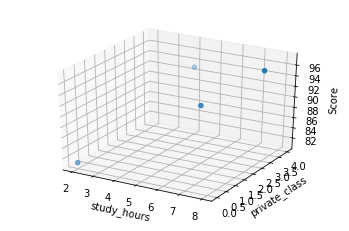

In [10]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d') # 그래프 유형
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist=11
ax.scatter(x1,x2,y)
plt.show()

이제 독립변수가 두가가 되었음으로 각각 $x_1$,$x_2$로 변수를 지정.  
각각의 기울기를 $a_1$과$a_2$라 한다.  
각각 앞서 했던 방법과 같은 방법으로 경사 하강법을 적용하고 학습률을 곱해 기존의 값을 업데이트 한다

In [11]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기
x1_data=np.array(x1)
x2_data=np.array(x2)
y_data=np.array(y)

In [12]:
print(x1_data)
print(x2_data)
print(y_data)

[2 4 6 8]
[0 4 2 3]
[81 93 91 97]


In [13]:
#기울기 a와 절편b의 값을 초기화
a1=0
a2=0
b=0

#학습률
lr=0.05

# 반복횟수
epochs=2001

# 경사 하강법
for i in range(epochs): # epochs=반복횟수
    y_pred = a1*x1_data+a2*x2_data+b # y를 구하는 식을 세우기
    error=y_data - y_pred # 오차를 구하는 식
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error)) # 오차 함수를 a1로 미분한 값
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error)) # 오차 함수를 a1로 미분한 값
    b_diff= -(1/len(x1_data)) * sum(y_data - y_pred)
    a1 = a1 - lr * a1_diff # 학습률을 곱해 기존의 a1 값 업데이트
    a2 = a2 - lr * a2_diff # 학습률을 곱해 기존의 a2 값 없데이트
    b = b - lr * b_diff # 학습률을 곱해 기존의 b 값 없데이트
    
    if i % 100 == 0:
        print("epoch%.f, 기울기1(a1)=%.04f, 기울기2(a2)=%0.4f, 절편(b)=%.4f" % (i, a1, a2, b))

epoch0, 기울기1(a1)=23.2000, 기울기2(a2)=10.5625, 절편(b)=4.5250
epoch100, 기울기1(a1)=6.4348, 기울기2(a2)=3.9893, 절편(b)=43.9757
epoch200, 기울기1(a1)=3.7255, 기울기2(a2)=3.0541, 절편(b)=62.5766
epoch300, 기울기1(a1)=2.5037, 기울기2(a2)=2.6323, 절편(b)=70.9656
epoch400, 기울기1(a1)=1.9527, 기울기2(a2)=2.4420, 절편(b)=74.7491
epoch500, 기울기1(a1)=1.7042, 기울기2(a2)=2.3562, 절편(b)=76.4554
epoch600, 기울기1(a1)=1.5921, 기울기2(a2)=2.3175, 절편(b)=77.2250
epoch700, 기울기1(a1)=1.5415, 기울기2(a2)=2.3001, 절편(b)=77.5720
epoch800, 기울기1(a1)=1.5187, 기울기2(a2)=2.2922, 절편(b)=77.7286
epoch900, 기울기1(a1)=1.5084, 기울기2(a2)=2.2886, 절편(b)=77.7992
epoch1000, 기울기1(a1)=1.5038, 기울기2(a2)=2.2870, 절편(b)=77.8310
epoch1100, 기울기1(a1)=1.5017, 기울기2(a2)=2.2863, 절편(b)=77.8453
epoch1200, 기울기1(a1)=1.5008, 기울기2(a2)=2.2860, 절편(b)=77.8518
epoch1300, 기울기1(a1)=1.5003, 기울기2(a2)=2.2858, 절편(b)=77.8547
epoch1400, 기울기1(a1)=1.5002, 기울기2(a2)=2.2858, 절편(b)=77.8561
epoch1500, 기울기1(a1)=1.5001, 기울기2(a2)=2.2857, 절편(b)=77.8567
epoch1600, 기울기1(a1)=1.5000, 기울기2(a2)=2.2857, 절편(b)=77.8569
epoch170

In [14]:
x1_data

array([2, 4, 6, 8])

In [15]:
x2_data

array([0, 4, 2, 3])

In [16]:
y_data

array([81, 93, 91, 97])

In [17]:
%matplotlib qt5
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('study hours')
ax.set_ylabel('private class')
ax.set_zlabel('Score')

X1, X2 = np.meshgrid(x1, x2)
Y = 1.5*X1+2.2857*X2+77.8571

ax.plot_surface(X1, X2, Y, rstride=4, cstride=4, alpha=0.4, cmap=cm.jet)
ax.scatter(x1,x2,y)

plt.show()

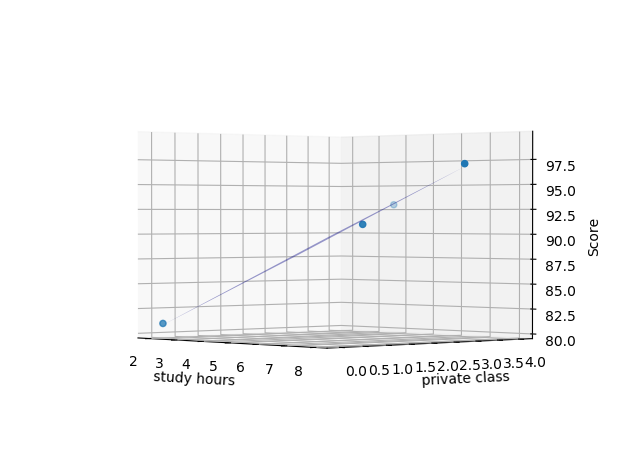

In [19]:
Image("D:/jupyter/deep_learning_for_everyone/04/4-7.png",width=500)

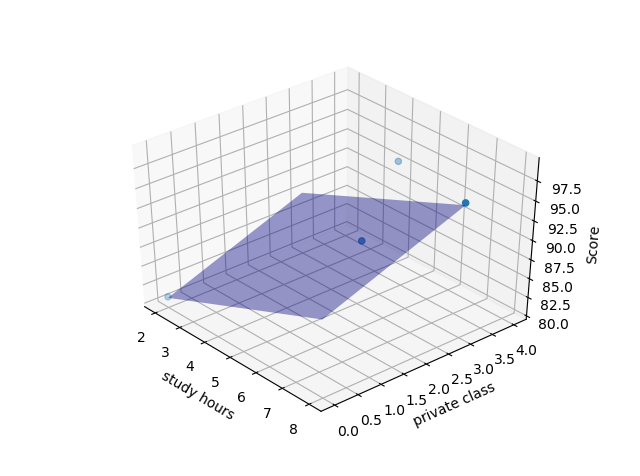

In [20]:
Image("D:/jupyter/deep_learning_for_everyone/04/4-7-2.png",width=500)

# 결론
 독립변수의 가중치에 대하여, 임의의 값을 대입한 후, 평균오차 제곱법을 사용해 이차함수를 만들고, 거기서 학습률을 주어 경사하강법을 통해 가장 적은 오차를 나타내는 최적의 가중치를 찾아내었다.
  이 방법을 통해 얻은 최적의 가중치로 최초로 세웠던 가설의 검증도 가능할것이라 사료된다. 가설을 토대로 세운 식에서 최소의 오차범위를 갖는 식을 찾아주는것 뿐이지. 정확한 식을 찾아주는 것이 아님으로, 가설을 세울 때, 정확한 요소를 찾아 알맞은 독립변수를 적용하는것이 매우 중요하다고 볼수 있다.